Carolina Niewöhner | Master Thesis | 19.07.2024


# EDA of GESIS dataset
In this notebook I am exploring all variables and further reducing the dimensions. Outliers are treated, too. Furthermore, the data is prepared for the clustering by applying a standardisation.

## Importing Packages

In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Importing Data

In [2]:
# Get the current working directory
current_dir = os.getcwd()

In [3]:
#importing csv file
df_housing= pd.read_csv(f"{current_dir}/tables/GESIS_reduced.csv",index_col=[0])

In [4]:
df_housing.head()

,floor_area,number_rooms,age,number_persons,under_6y,6y_13y,14y_17y,18y_65y,over_66y,with_partner,...,1250_1500,1500_1750,1750_2000,2000_2250,2250_2500,2500__3000,3000_4000,4000_5000,5000_above,area_per_person
0,213.0,6.0,78.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,...,0,0,0,0,0,0,1,0,0,106.5
1,48.0,2.0,32.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,48.0
2,120.0,4.0,48.0,4.0,0.0,0.0,2.0,2.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,30.0
3,45.0,2.0,29.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,22.5
4,46.0,2.0,25.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,46.0


# Descriptives

Here  are histograms of all variables to see overall distribution and if they are normally distributed.

### Function for histogram of continous variables

In [5]:
#function to plot histograms saved as svg
def hist_function (variable,x_axis_title,bin_width=None):
    if bin_width:
        floor_area_histogram = sns.histplot(df_housing[variable], color="lightgrey", bins=bin_width,discrete=True)
    else:
        floor_area_histogram = sns.histplot(df_housing[variable], color="lightgrey")
    plt.xlabel(x_axis_title)  # X-axis label
    plt.ylabel('Count Households')  # Y-axis label
    plt.savefig(str("figures/hist_variables/histogram_"+variable+".svg"), format='svg',bbox_inches='tight')
    plt.tight_layout()
    plt.show()

### Floor area

C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


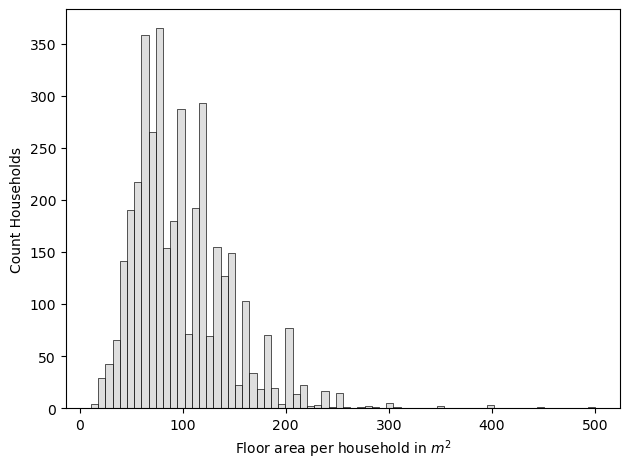

In [6]:
hist_function('floor_area','Floor area per household in $m^2$')

The floor area per household seems to be not normally distributed as some outliers skew the curve to the right.

### Number of person

C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


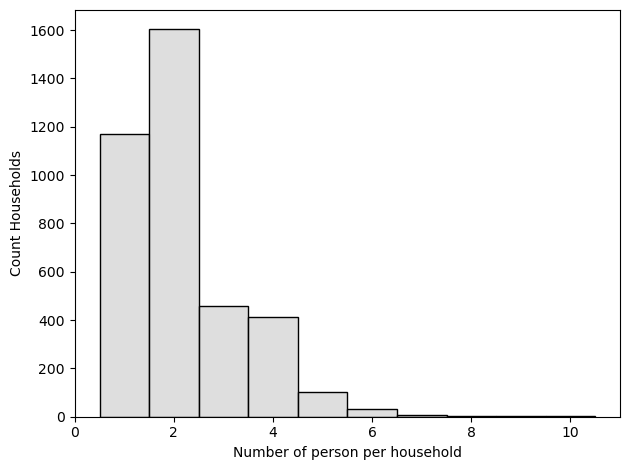

In [7]:
hist_function('number_persons','Number of person per household',10)

The number of persons per household seems to be not normally distributed as some outliers skew the curve to the right.

### Floor area per person

C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


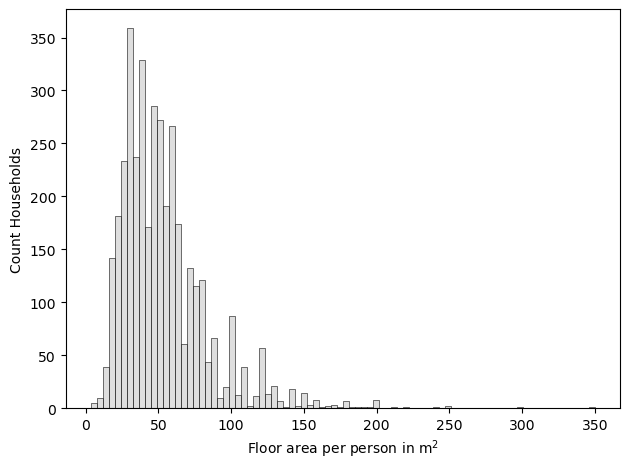

In [8]:
hist_function('area_per_person','Floor area per person in m$^2$')

C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


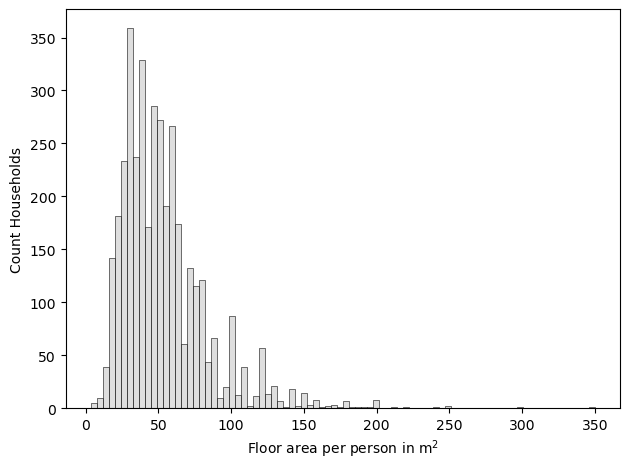

In [9]:
hist_function('area_per_person','Floor area per person in m$^2$')

As the floor area per household and the number of person per household the distribution seems to be skewed to the right.

### Number of rooms

C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


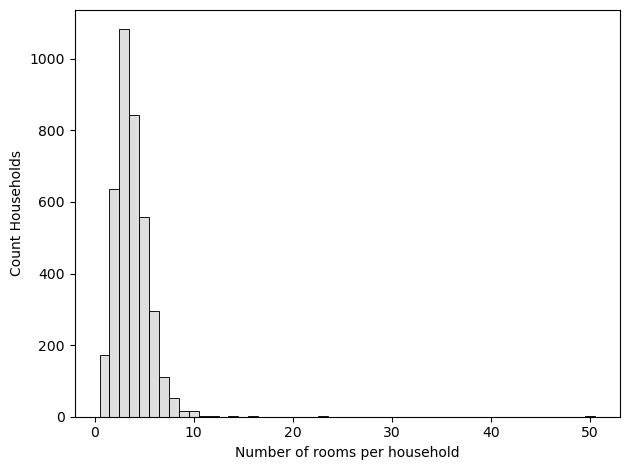

In [10]:
hist_function('number_rooms','Number of rooms per household',50)

Skewed to the right due to outliers above 10, one with 50 rroms, one with 23, one with 17.

### Age of respondent

C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


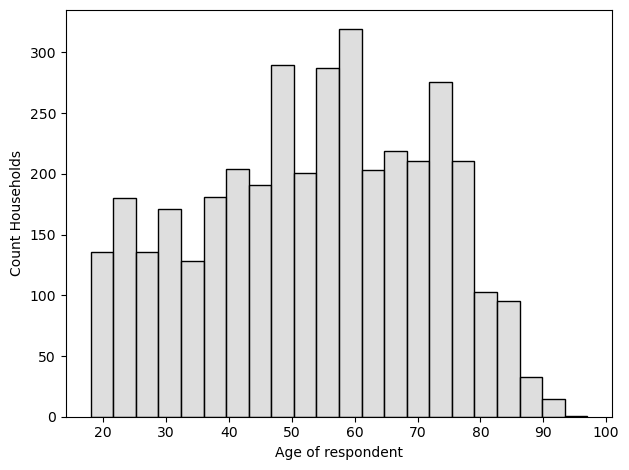

In [11]:
hist_function('age','Age of respondent')

### Under 6 year olds

C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


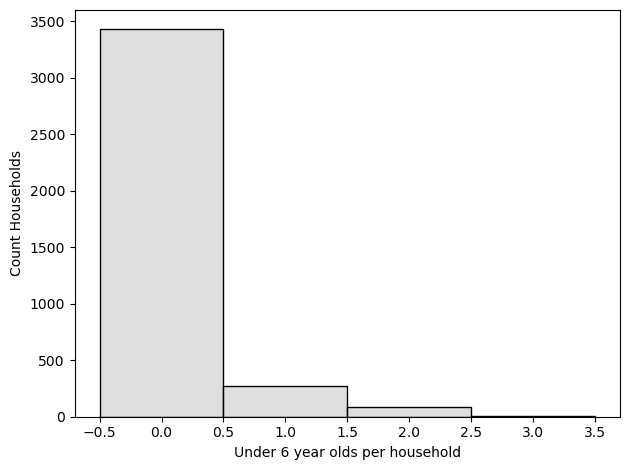

In [12]:
hist_function('under_6y','Under 6 year olds per household',4)

### 6-13 year olds

C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


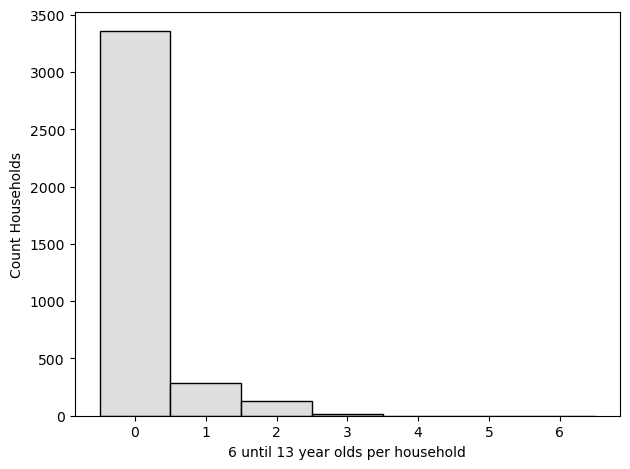

In [13]:
hist_function('6y_13y','6 until 13 year olds per household',10)

### 14-17 year olds

C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


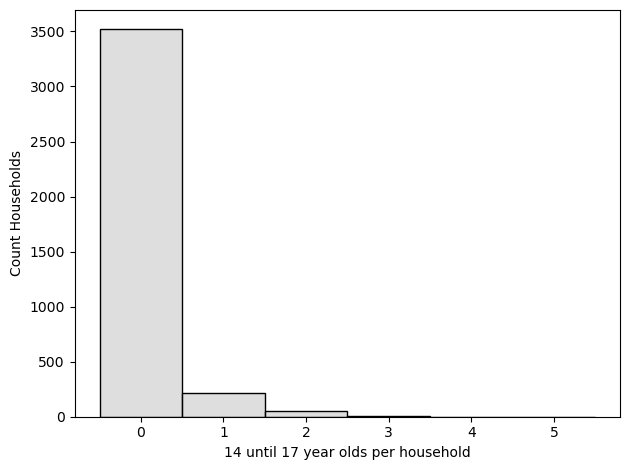

In [14]:
hist_function('14y_17y','14 until 17 year olds per household',10)

### 18-65 year olds

C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


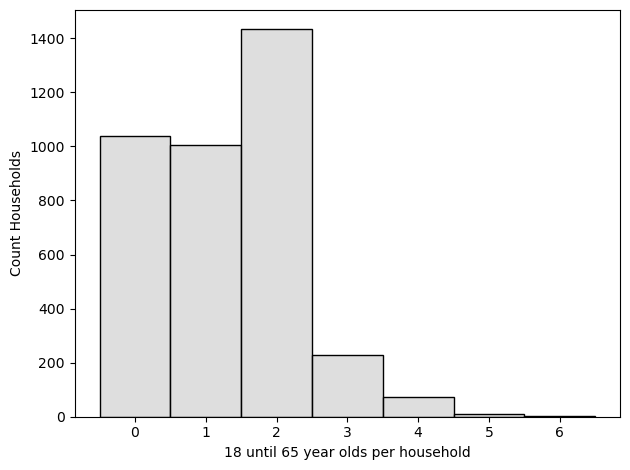

In [15]:
hist_function('18y_65y','18 until 65 year olds per household',10)

### Over 66 year olds

C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


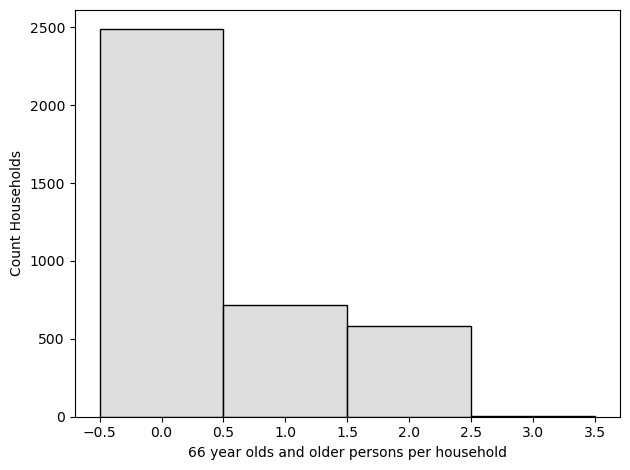

In [16]:
hist_function('over_66y','66 year olds and older persons per household',10)

### Function for plots of categorical variables

In [17]:
def plot_dummy_variable_counts_simple(df,figure_title,topic): #if the variable names are the same as the label
    # Sum each column to count occurrences of 1
    counts = df.sum(axis=0)
    
    # Plotting
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    sns.barplot(x=counts.index, y=counts.values, color='lightgrey')
    plt.xlabel(figure_title)
    plt.ylabel('Number of households')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.savefig(str("figures/hist_variables/histogram_"+topic+".svg"), format='svg',bbox_inches='tight')
    plt.tight_layout()
    plt.show()

In [18]:
def plot_dummy_variable_counts(df,figure_title,topic,x_labels):
    # Sum each column to count occurrences of 1
    counts = df.sum(axis=0)
    # Plotting
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    sns.barplot(x=x_labels, y=counts.values, color='lightgrey')
    plt.xlabel(figure_title)
    plt.ylabel('Number of households')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.savefig(str("figures/hist_variables/histogram_"+topic+".svg"), format='svg',bbox_inches='tight')
    plt.tight_layout()
    plt.show()

### Living situation

C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinst

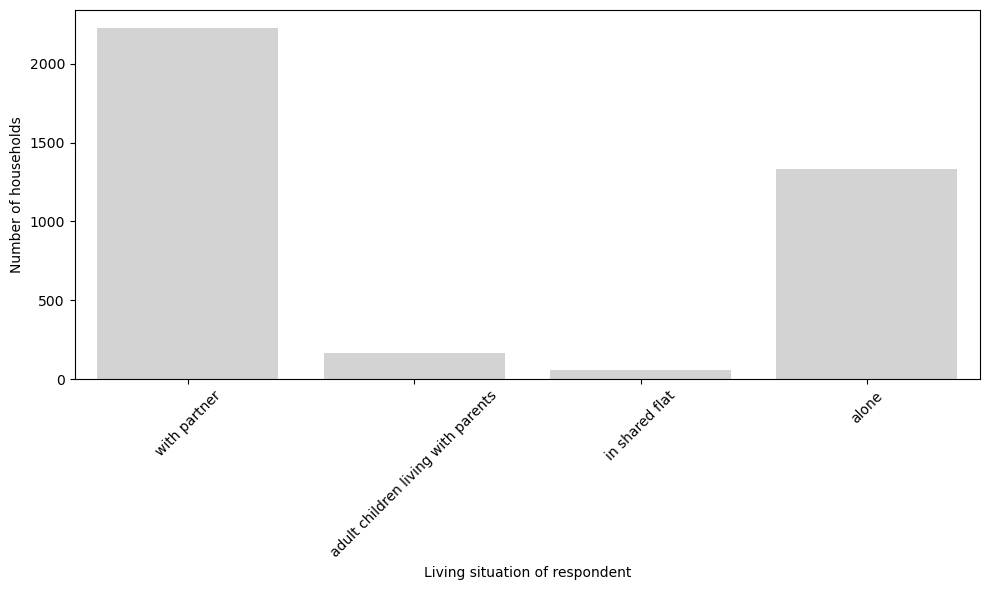

In [19]:
x_labels=["with partner","adult children living with parents","in shared flat","alone"]
plot_dummy_variable_counts(df_housing.loc[:,"with_partner":"alone"],"Living situation of respondent","living_situation",x_labels)

### West east

C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinst

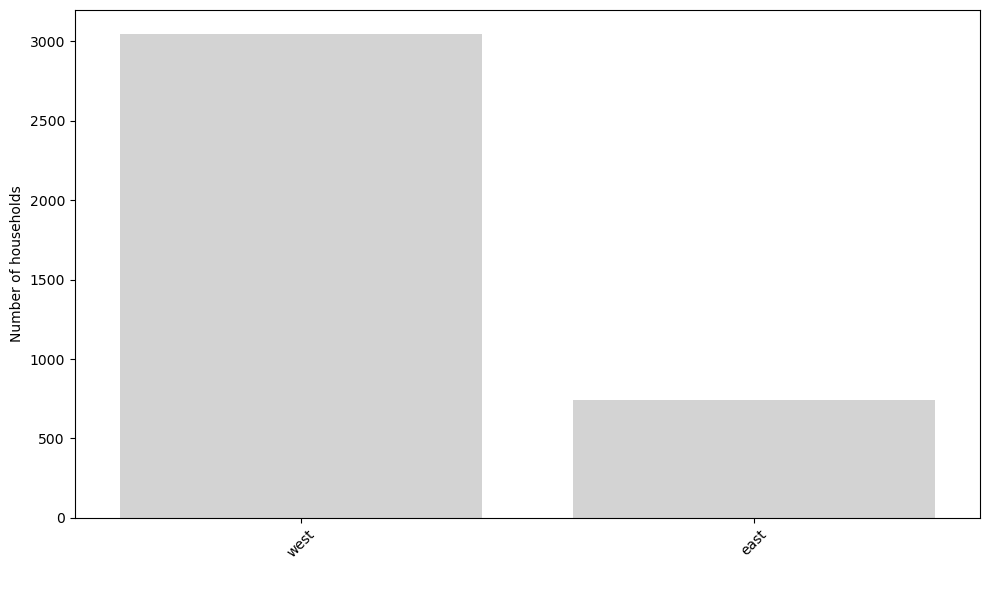

In [20]:
x_labels=["west","east"]
plot_dummy_variable_counts(df_housing.loc[:,"west":"east"]," ","west_east",x_labels)

### Size of city

C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinst

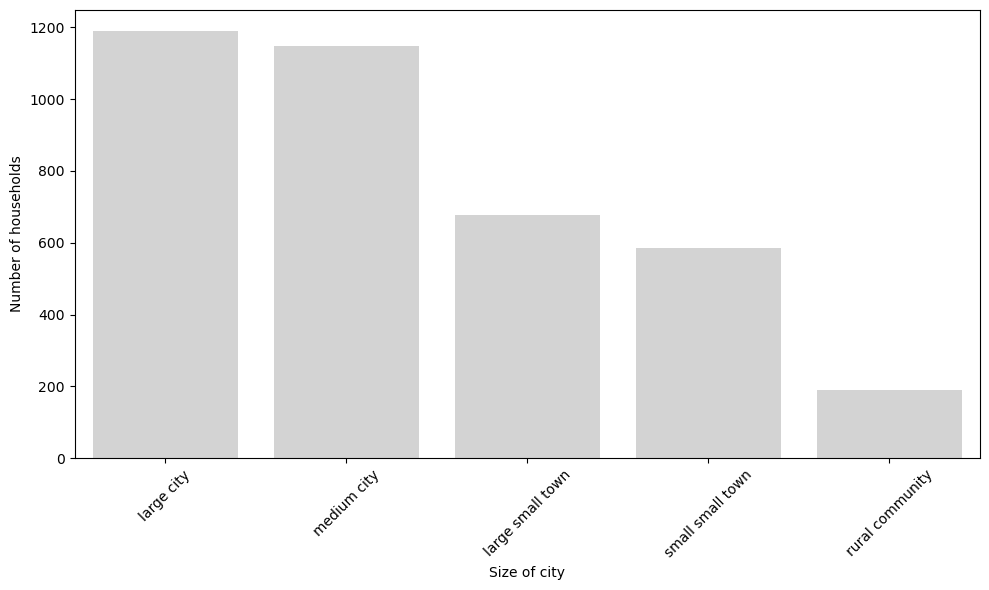

In [21]:
x_labels=["large city","medium city","large small town","small small town","rural community"]
plot_dummy_variable_counts(df_housing.loc[:,"large_city":"rural_community"],"Size of city","size_city",x_labels)

### Ownership

C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinst

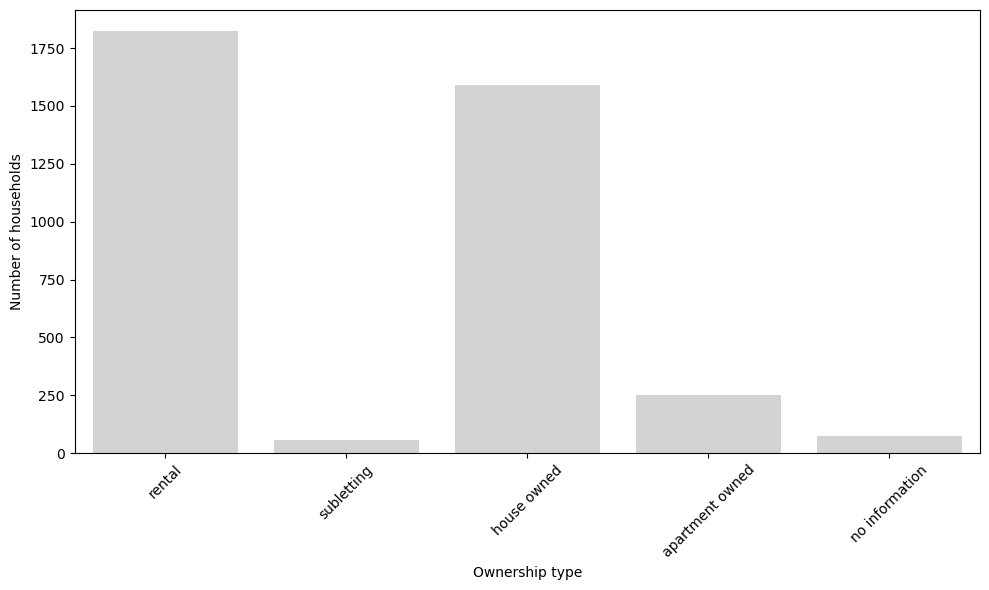

In [22]:
x_labels=["rental","subletting","house owned","apartment owned","no information"]
plot_dummy_variable_counts(df_housing.loc[:,"rental":"nd_ownership"],"Ownership type","ownership",x_labels)

### Housing Type

C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinst

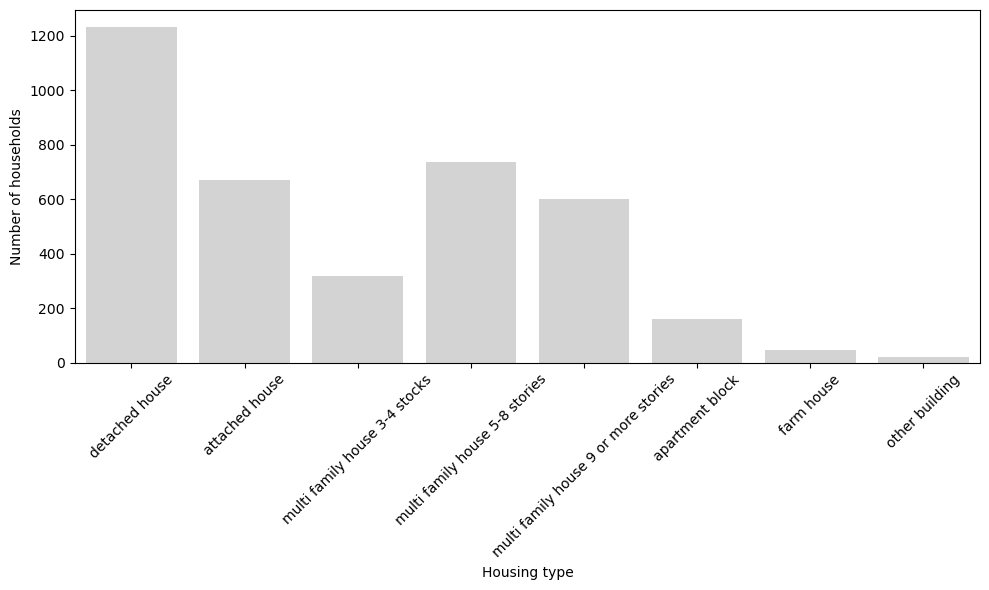

In [23]:
x_labels=["detached house","attached house","multi family house 3-4 stocks","multi family house 5-8 stories","multi family house 9 or more stories","apartment block","farm house","other building"]
plot_dummy_variable_counts(df_housing.loc[:,"detached_house":"other_building"],"Housing type","housing_type",x_labels)

### Sex

C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinst

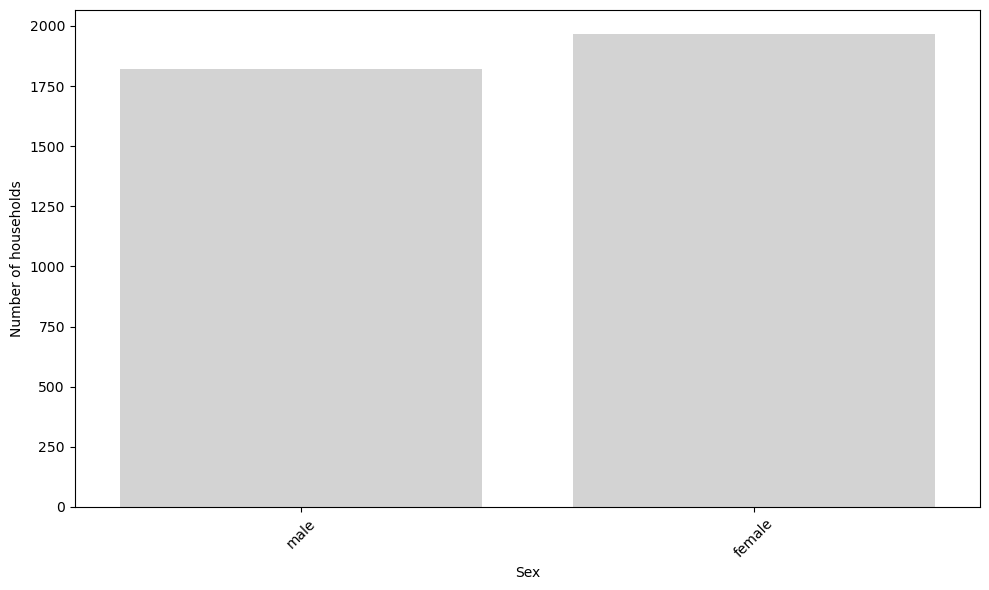

In [24]:
x_labels=["male","female"]
plot_dummy_variable_counts(df_housing.loc[:,"male":"female"],"Sex","sex",x_labels)

### Relationship

C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinst

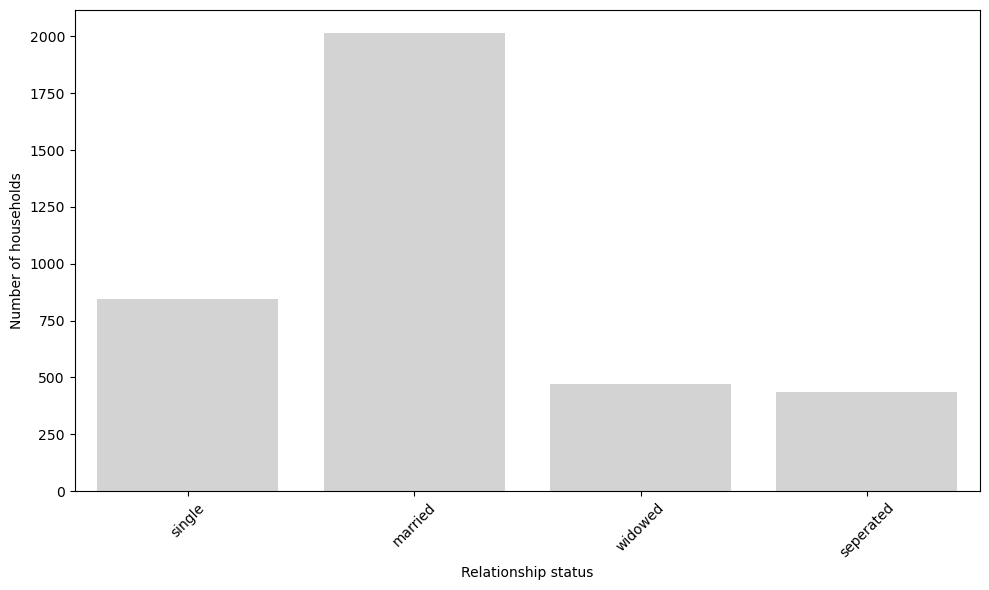

In [25]:
x_labels=["single","married","widowed","seperated"]
plot_dummy_variable_counts(df_housing.loc[:,"single":"seperated"],"Relationship status","relationship",x_labels)

### Employment

C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


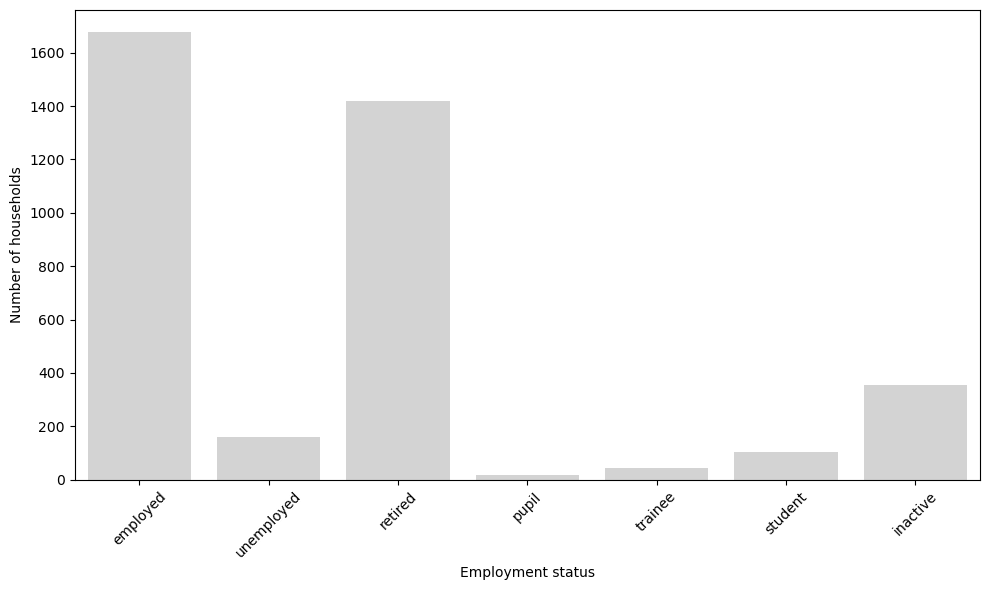

In [26]:
plot_dummy_variable_counts_simple(df_housing.loc[:,"employed":"inactive"],"Employment status","employment")

### Income

C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Python\Anaconda\envs\SpatialDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinst

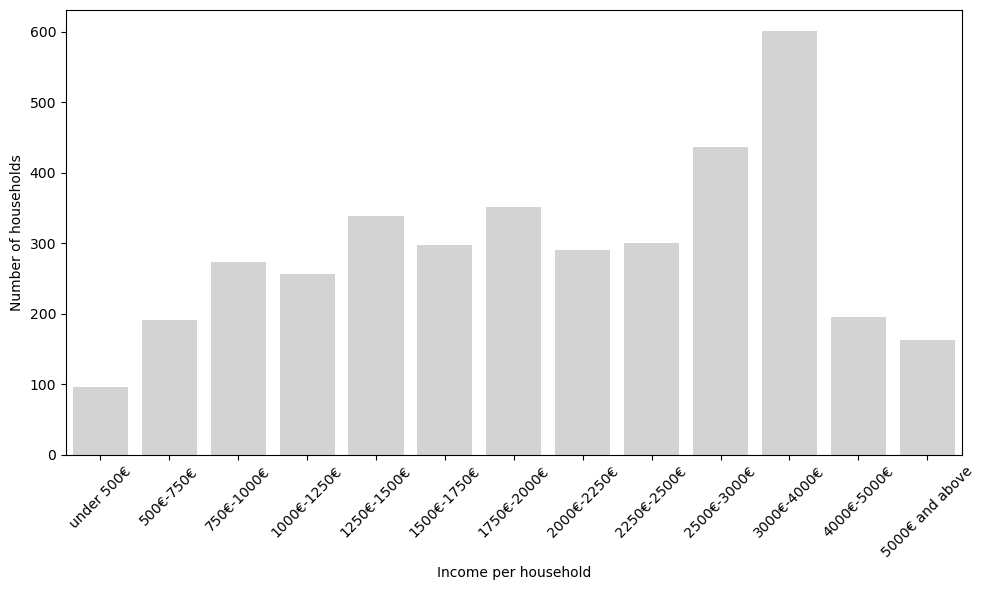

In [27]:
x_labels=["under 500€","500€-750€","750€-1000€","1000€-1250€","1250€-1500€","1500€-1750€","1750€-2000€","2000€-2250€","2250€-2500€","2500€-3000€","3000€-4000€","4000€-5000€","5000€ and above"]
plot_dummy_variable_counts(df_housing.loc[:,"under_500":"5000_above"],"Income per household","income",x_labels)

## Outlier treatment

In [28]:
df_housing.describe()

,floor_area,number_rooms,age,number_persons,under_6y,6y_13y,14y_17y,18y_65y,over_66y,with_partner,...,1250_1500,1500_1750,1750_2000,2000_2250,2250_2500,2500__3000,3000_4000,4000_5000,5000_above,area_per_person
count,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,...,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000
mean,99.055922,3.770509,53.501451,2.163809,0.123978,0.159325,0.088103,1.293326,0.499077,0.588235,...,0.089422,0.078607,0.092851,0.076497,0.079135,0.115009,0.158533,0.051438,0.042997,53.512308
std,46.996716,1.827404,18.069448,1.153779,0.411488,0.486701,0.344031,1.015165,0.748921,0.492218,...,0.285390,0.269160,0.290262,0.265827,0.269985,0.319075,0.365289,0.220918,0.202876,30.129467
min,11.000000,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.666667
25%,65.000000,3.000000,40.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.500000
50%,90.000000,4.000000,55.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000
75%,120.000000,5.000000,68.000000,3.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000
max,500.000000,50.000000,97.000000,10.000000,3.000000,6.000000,5.000000,6.000000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,350.000000


In [29]:
df_housing[df_housing['number_rooms'] == 50]

,floor_area,number_rooms,age,number_persons,under_6y,6y_13y,14y_17y,18y_65y,over_66y,with_partner,...,1250_1500,1500_1750,1750_2000,2000_2250,2250_2500,2500__3000,3000_4000,4000_5000,5000_above,area_per_person
3787,80.0,50.0,72.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,...,0,1,0,0,0,0,0,0,0,40.0


The respondent seems to have made a mistkae entering the number of rooms. This observation will be excluded from the cluster analysis.

In [30]:
df_housing_wo_out = df_housing[df_housing['number_rooms'] != 50]
df_housing_wo_out

,floor_area,number_rooms,age,number_persons,under_6y,6y_13y,14y_17y,18y_65y,over_66y,with_partner,...,1250_1500,1500_1750,1750_2000,2000_2250,2250_2500,2500__3000,3000_4000,4000_5000,5000_above,area_per_person
0,213.0,6.0,78.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,...,0,0,0,0,0,0,1,0,0,106.5
1,48.0,2.0,32.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,48.0
2,120.0,4.0,48.0,4.0,0.0,0.0,2.0,2.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,30.0
3,45.0,2.0,29.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,22.5
4,46.0,2.0,25.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,38.0,2.0,70.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,38.0
3896,95.0,3.0,72.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,...,0,0,0,0,0,0,1,0,0,47.5
3897,126.0,6.0,75.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,126.0
3898,160.0,8.0,82.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,...,0,0,0,0,1,0,0,0,0,80.0


In [31]:
df_housing_wo_out.describe()

,floor_area,number_rooms,age,number_persons,under_6y,6y_13y,14y_17y,18y_65y,over_66y,with_partner,...,1250_1500,1500_1750,1750_2000,2000_2250,2250_2500,2500__3000,3000_4000,4000_5000,5000_above,area_per_person
count,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,...,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000
mean,99.060950,3.758311,53.496570,2.163852,0.124011,0.159367,0.088127,1.293668,0.498681,0.588127,...,0.089446,0.078364,0.092876,0.076517,0.079156,0.115040,0.158575,0.051451,0.043008,53.515873
std,47.001898,1.666161,18.069333,1.153929,0.411537,0.486759,0.344073,1.015081,0.748623,0.492237,...,0.285424,0.268779,0.290297,0.265859,0.270017,0.319112,0.365328,0.220945,0.202902,30.132643
min,11.000000,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.666667
25%,65.000000,3.000000,40.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.500000
50%,90.000000,4.000000,55.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000
75%,120.000000,5.000000,68.000000,3.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000
max,500.000000,23.000000,97.000000,10.000000,3.000000,6.000000,5.000000,6.000000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,350.000000


### Reduction of variables

In [32]:
df_housing_wo_out.columns

Index(['floor_area', 'number_rooms', 'age', 'number_persons', 'under_6y',
       '6y_13y', '14y_17y', '18y_65y', 'over_66y', 'with_partner',
       'with_parents_adultchildren', 'in_shared_flat', 'alone', 'west', 'east',
       'large_city', 'medium_city', 'large_small_town', 'small_small_town',
       'rural_community', 'rental', 'subletting', 'house_owned',
       'apartment_owned', 'nd_ownership', 'detached_house', 'attached_house',
       'multifamily_house_34', 'multifamily_house_58',
       'multifamily_house_9more', 'apartment_block', 'farm_house',
       'other_building', 'male', 'female', 'single', 'married', 'widowed',
       'seperated', 'employed', 'unemployed', 'retired', 'pupil', 'trainee',
       'student', 'inactive', 'under_500', '500_750', '750_1000', '1000_1250',
       '1250_1500', '1500_1750', '1750_2000', '2000_2250', '2250_2500',
       '2500__3000', '3000_4000', '4000_5000', '5000_above',
       'area_per_person'],
      dtype='object')

Dropping:
- nd_ownership, 'rental', 'subletting', 'house_owned',
       'apartment_owned' --> only ownership
- male (same as non female)
- 'single', 'married', 'widowed', 'seperated' --> we already know when they are alone
- 'pupil', 'trainee', 'student', 'inactive' --> only employed or retired interesting
- number_rooms --> not relevant
- 'with_parents_adultchildren', 'in_shared_flat''alone' --> only interesting alone or with partner or other
 - make one multi family column for all types of multi family houses
 - make one children column

In [33]:
# Merge the columns into a new column called 'multifamily_house'
df_housing_wo_out['multifamily_house'] = df_housing_wo_out['multifamily_house_34'] + df_housing_wo_out['multifamily_house_58'] + df_housing_wo_out['multifamily_house_9more']

# Drop the original columns
df_housing_wo_out.drop(columns=['multifamily_house_34', 'multifamily_house_58', 'multifamily_house_9more'], inplace=True)


C:\Users\Carolina Niewöhner\AppData\Local\Temp\ipykernel_2064\151503676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_housing_wo_out['multifamily_house'] = df_housing_wo_out['multifamily_house_34'] + df_housing_wo_out['multifamily_house_58'] + df_housing_wo_out['multifamily_house_9more']
C:\Users\Carolina Niewöhner\AppData\Local\Temp\ipykernel_2064\151503676.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_housing_wo_out.drop(columns=['multifamily_house_34', 'multifamily_house_58', 'multifamily_house_9more'], inplace=True)


In [34]:
# Merge the columns into a new column called 'children'
df_housing_wo_out['children'] = df_housing_wo_out['under_6y'] + df_housing_wo_out['6y_13y'] + df_housing_wo_out['14y_17y']

# Drop the original columns
df_housing_wo_out.drop(columns=['under_6y', '6y_13y', '14y_17y'], inplace=True)


C:\Users\Carolina Niewöhner\AppData\Local\Temp\ipykernel_2064\4041200146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_housing_wo_out['children'] = df_housing_wo_out['under_6y'] + df_housing_wo_out['6y_13y'] + df_housing_wo_out['14y_17y']
C:\Users\Carolina Niewöhner\AppData\Local\Temp\ipykernel_2064\4041200146.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_housing_wo_out.drop(columns=['under_6y', '6y_13y', '14y_17y'], inplace=True)


In [35]:
# Merge the columns into a new column called 'ownership'
df_housing_wo_out['ownership'] = df_housing_wo_out['house_owned'] + df_housing_wo_out['apartment_owned'] 
# Drop the original columns
df_housing_wo_out.drop(columns=['rental', 'subletting', 'house_owned','apartment_owned'], inplace=True)


C:\Users\Carolina Niewöhner\AppData\Local\Temp\ipykernel_2064\1806047936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_housing_wo_out['ownership'] = df_housing_wo_out['house_owned'] + df_housing_wo_out['apartment_owned']
C:\Users\Carolina Niewöhner\AppData\Local\Temp\ipykernel_2064\1806047936.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_housing_wo_out.drop(columns=['rental', 'subletting', 'house_owned','apartment_owned'], inplace=True)


In [36]:
df_housing_reduced=df_housing_wo_out.drop(columns=['nd_ownership','male',
                                                   'single', 'married', 'widowed','seperated','alone',
                                                   'pupil', 'trainee','student', 'inactive','number_rooms',
                                                   'with_parents_adultchildren', 'in_shared_flat'])

#### Reducing dataset even more

not useful:
- age of respondent only
- sex: female --> only of respondent
- 'employed', 'unemployed', 'retired' --> respondent info is not useful as it says nothing about the household
- too many income variabley
- other building --> will be other building otherwise
- east, can only be west or east

In [37]:
df_housing_reduced.columns

Index(['floor_area', 'age', 'number_persons', '18y_65y', 'over_66y',
       'with_partner', 'west', 'east', 'large_city', 'medium_city',
       'large_small_town', 'small_small_town', 'rural_community',
       'detached_house', 'attached_house', 'apartment_block', 'farm_house',
       'other_building', 'female', 'employed', 'unemployed', 'retired',
       'under_500', '500_750', '750_1000', '1000_1250', '1250_1500',
       '1500_1750', '1750_2000', '2000_2250', '2250_2500', '2500__3000',
       '3000_4000', '4000_5000', '5000_above', 'area_per_person',
       'multifamily_house', 'children', 'ownership'],
      dtype='object')

In [38]:
# Merge the columns into a new columns for the income classes
df_housing_reduced['low_income_class'] = df_housing_reduced['under_500'] + df_housing_reduced['500_750'] + df_housing_reduced['750_1000'] + df_housing_reduced['1000_1250'] + df_housing_reduced['1250_1500'] 
df_housing_reduced['low_middle_income_class'] = df_housing_reduced['1500_1750'] + df_housing_reduced['1750_2000']
df_housing_reduced['middle_income_class'] = df_housing_reduced['2000_2250'] + df_housing_reduced['2250_2500'] + df_housing_reduced['2500__3000']
df_housing_reduced['upper_middle_income_class'] = df_housing_reduced['3000_4000']
df_housing_reduced['high_income_class'] = df_housing_reduced['5000_above']
# Drop the original columns
df_housing_reduced.drop(columns=['under_500', '500_750', '750_1000', '1000_1250',
       '1250_1500', '1500_1750', '1750_2000', '2000_2250', '2250_2500',
       '2500__3000', '3000_4000', '4000_5000', '5000_above'], inplace=True)

In [39]:
var_useful=['floor_area', 'number_persons','area_per_person','children', '18y_65y', 'over_66y','with_partner', 'west',
            'large_city', 'medium_city','large_small_town', 'small_small_town', 'rural_community',
            'detached_house', 'attached_house', 'multifamily_house', 'apartment_block', 'farm_house',
            'low_income_class', 'low_middle_income_class','middle_income_class', 'upper_middle_income_class','high_income_class',
            'ownership']

In [40]:
df_housing_reduced2=df_housing_reduced[var_useful]

In [41]:
df_housing_reduced2.T

,0,1,2,3,4,5,6,7,8,9,...,3890,3891,3892,3893,3894,3895,3896,3897,3898,3899
floor_area,213.0,48.0,120.0,45.0,46.0,64.0,70.0,33.0,78.0,46.0,...,120.0,150.0,116.0,210.0,58.0,38.0,95.0,126.0,160.0,100.0
number_persons,2.0,1.0,4.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,...,2.0,4.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0
area_per_person,106.5,48.0,30.0,22.5,46.0,64.0,35.0,33.0,39.0,46.0,...,60.0,37.5,58.0,105.0,29.0,38.0,47.5,126.0,80.0,100.0
children,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
18y_65y,0.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,...,0.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
over_66y,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,1.0
with_partner,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
west,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
large_city,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
medium_city,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


### Correlation matrix

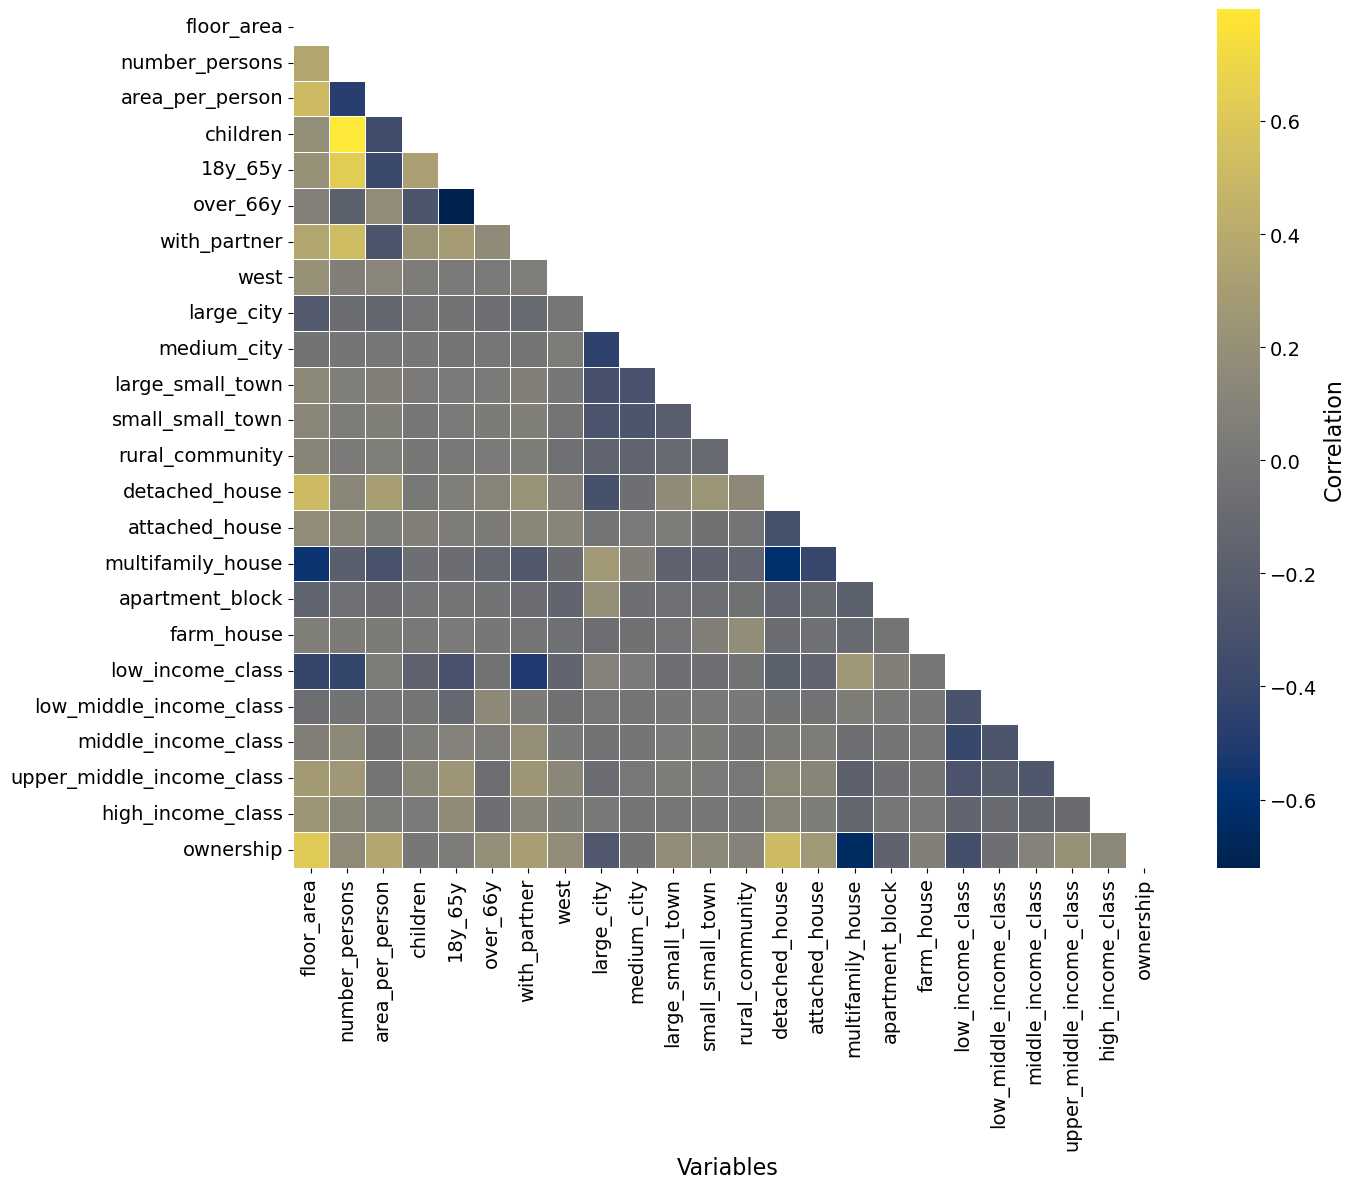

In [42]:
correlation_matrix = df_housing_reduced2.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generate a heatmap with larger figure size and better color scheme
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation_matrix, cmap='cividis', mask=mask, linewidths=.5, cbar=True)

# Set font size for x-axis label
heatmap.set_xlabel('Variables', fontsize=16)  # Adjust fontsize as needed

# Set font size for ticks of the color bar legend
cbar = heatmap.collections[0].colorbar
cbar.set_label('Correlation', fontsize=16)
cbar.ax.tick_params(labelsize=14)  # Adjust fontsize as needed

# Set font size for ticks of x-axis and y-axis
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

# Save the plot
plt.savefig(("figures/correlationmatrix.png"), format='png')

plt.show()


## Preperation for clustering

### Standardization

In [43]:
df_housing_reduced.columns

Index(['floor_area', 'age', 'number_persons', '18y_65y', 'over_66y',
       'with_partner', 'west', 'east', 'large_city', 'medium_city',
       'large_small_town', 'small_small_town', 'rural_community',
       'detached_house', 'attached_house', 'apartment_block', 'farm_house',
       'other_building', 'female', 'employed', 'unemployed', 'retired',
       'area_per_person', 'multifamily_house', 'children', 'ownership',
       'low_income_class', 'low_middle_income_class', 'middle_income_class',
       'upper_middle_income_class', 'high_income_class'],
      dtype='object')

#### Saving reduced dataframe

In [44]:
df_housing_reduced2.to_csv('tables/20240326_GESIS_reduced.csv', index=True)

In [45]:
# Initialize scaler
scaler = MinMaxScaler()
# Perform scaling
df_housing_stand = pd.DataFrame(scaler.fit_transform(df_housing_reduced2),columns=df_housing_reduced2.columns)
df_housing_stand

,floor_area,number_persons,area_per_person,children,18y_65y,over_66y,with_partner,west,large_city,medium_city,...,attached_house,multifamily_house,apartment_block,farm_house,low_income_class,low_middle_income_class,middle_income_class,upper_middle_income_class,high_income_class,ownership
0,0.413088,0.111111,0.296920,0.000000,0.000000,0.666667,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.075665,0.000000,0.128008,0.000000,0.166667,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.222904,0.333333,0.076035,0.285714,0.333333,0.000000,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.069530,0.111111,0.054379,0.000000,0.333333,0.000000,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.071575,0.000000,0.122233,0.000000,0.166667,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,0.055215,0.000000,0.099134,0.000000,0.000000,0.333333,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3786,0.171779,0.111111,0.126564,0.000000,0.000000,0.666667,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3787,0.235174,0.000000,0.353224,0.000000,0.000000,0.333333,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3788,0.304703,0.111111,0.220404,0.000000,0.000000,0.666667,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


#### Saving stadardized dataframe

In [46]:
df_housing_stand.to_csv('tables/20240326_GESIS_reduced_stand.csv', index=True)

### Mean values of each quartile for all variables

In [47]:
df_copy = df_housing_reduced2.copy()  # Create a copy of the DataFrame

# Calculate quartiles of 'area_per_person'
quartiles = df_copy['area_per_person'].quantile([0.25, 0.5, 0.75])

# Function to assign quartile group
def assign_quartile(area_per_person):
    if area_per_person <= quartiles[0.25]:
        return 'Q1'
    elif area_per_person <= quartiles[0.5]:
        return 'Q2'
    elif area_per_person <= quartiles[0.75]:
        return 'Q3'
    else:
        return 'Q4'

# Add a new column for quartile group
df_copy['area_per_person_quartile'] = df_copy['area_per_person'].apply(assign_quartile)

# Group by quartile group and calculate mean for each variable
grouped_mean = df_copy.groupby('area_per_person_quartile').mean()

# Save the copy with the new column
df_copy.to_csv('df_housing_reduced_with_quartile_column.csv', index=True)

In [48]:
grouped_mean.T

area_per_person_quartile,Q1,Q2,Q3,Q4
floor_area,76.786378,90.767492,96.825126,134.192865
number_persons,3.126935,2.289559,1.743719,1.459309
area_per_person,25.363254,39.885899,55.971357,95.320699
children,1.011352,0.349839,0.086432,0.018952
18y_65y,1.856553,1.515608,1.021106,0.758082
over_66y,0.259030,0.424112,0.636181,0.682274
with_partner,0.725490,0.663079,0.560804,0.392419
west,0.752322,0.775027,0.797990,0.894091
large_city,0.413829,0.313240,0.290452,0.231884
medium_city,0.288958,0.326157,0.299497,0.295429
